In [65]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
# import library
import json
import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics
import folium
from folium import plugins
import missingno as mnso
import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def datainfo(data):
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

# Data Preprocessing

In [4]:
# 경로
import os
root_dir = '/content/drive/MyDrive/2022-2/ML/팀플/data-main 3'
data_dir = os.path.join(root_dir, 'data')
weather_data_path = os.path.join(data_dir, 'SURFACE_ASOS_108_HR_2021_2021_2022.csv') # 원본 날씨 데이터 위치
sharing_data_path = os.path.join(data_dir, '대여소정보_이용정보(시간대별).csv') # 원본 자전거 대여소 데이터 위치
seodaemunAndmapo_path = os.path.join(data_dir, 'seodaemunAndmapo.csv') # 날씨 + 자전거 대여소 데이터 위치


In [5]:
df = pd.read_csv(seodaemunAndmapo_path)

In [6]:
df.info() #9401개의 데이터

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972800 entries, 0 to 972799
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     972800 non-null  object 
 1   대여시간     972800 non-null  int64  
 2   대여소번호    972800 non-null  int64  
 3   이용건수     972800 non-null  float64
 4   이동거리     972799 non-null  float64
 5   사용시간     972799 non-null  float64
 6   월        972800 non-null  int64  
 7   일        972800 non-null  int64  
 8   요일       972800 non-null  int64  
 9   기온(°C)   972800 non-null  float64
 10  강수량(mm)  972800 non-null  float64
 11  풍속(m/s)  972800 non-null  float64
 12  습도(%)    972800 non-null  int64  
 13  소재지(위치)  972800 non-null  object 
dtypes: float64(6), int64(6), object(2)
memory usage: 103.9+ MB


In [7]:
df.head()

,대여일자,대여시간,대여소번호,이용건수,이동거리,사용시간,월,일,요일,기온(°C),강수량(mm),풍속(m/s),습도(%),소재지(위치)
0,2021-01-01 00:00:00,0,192,1.0,908.98,7.0,1,1,4,-8.3,0.0,1.8,66,서대문구
1,2021-01-01 00:00:00,13,192,1.0,460.03,11.0,1,1,4,-0.2,0.0,3.0,56,서대문구
2,2021-01-01 00:00:00,13,192,1.0,0.00,25.0,1,1,4,-0.2,0.0,3.0,56,서대문구
3,2021-01-01 00:00:00,15,192,1.0,0.00,5.0,1,1,4,1.2,0.0,2.6,52,서대문구
4,2021-01-01 00:00:00,18,192,1.0,0.00,125.0,1,1,4,-1.4,0.0,2.1,68,서대문구


In [8]:
df.drop(columns=['대여일자'], inplace=True)
# df.drop(columns=['일시'], inplace=True)
df.drop(columns=['대여소번호'], inplace=True)
df.drop(columns=['이동거리'], inplace=True)
df.drop(columns=['사용시간'], inplace=True)

In [12]:
cols = ['소재지(위치)', '월', '일', '대여시간', '요일', '기온(°C)', '풍속(m/s)', '강수량(mm)', '습도(%)']
df = df.groupby(cols)['이용건수'].agg(이용건수='sum').reset_index()

In [13]:
# 소재지 (위치) 값 정수로 변경
# 마포구:1, 서대문구:2
df['소재지(위치)']=df['소재지(위치)'].replace(['마포구','서대문구'],[1,2])
df.astype({'소재지(위치)':'int'})
print(df.head())
print(df.dtypes)

   소재지(위치)  월  일  대여시간  요일  기온(°C)  풍속(m/s)  강수량(mm)  습도(%)  이용건수
0        1  1  1     0   4    -8.3      1.8      0.0     66  20.0
1        1  1  1     1   4    -8.7      2.4      0.0     68  19.0
2        1  1  1     2   4    -9.1      1.6      0.0     69  17.0
3        1  1  1     3   4    -9.3      1.1      0.0     70  11.0
4        1  1  1     4   4    -9.3      0.3      0.0     71   6.0
소재지(위치)      int64
월            int64
일            int64
대여시간         int64
요일           int64
기온(°C)     float64
풍속(m/s)    float64
강수량(mm)    float64
습도(%)        int64
이용건수       float64
dtype: object


In [14]:
datainfo(df)

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
소재지(위치),int64,9401,2,0,0.0
월,int64,9401,12,0,0.0
일,int64,9401,31,0,0.0
대여시간,int64,9401,24,0,0.0
요일,int64,9401,7,0,0.0
기온(°C),float64,9401,491,0,0.0
풍속(m/s),float64,9401,75,0,0.0
강수량(mm),float64,9401,64,0,0.0
습도(%),int64,9401,82,0,0.0
이용건수,float64,9401,655,0,0.0


## Feature Engineering

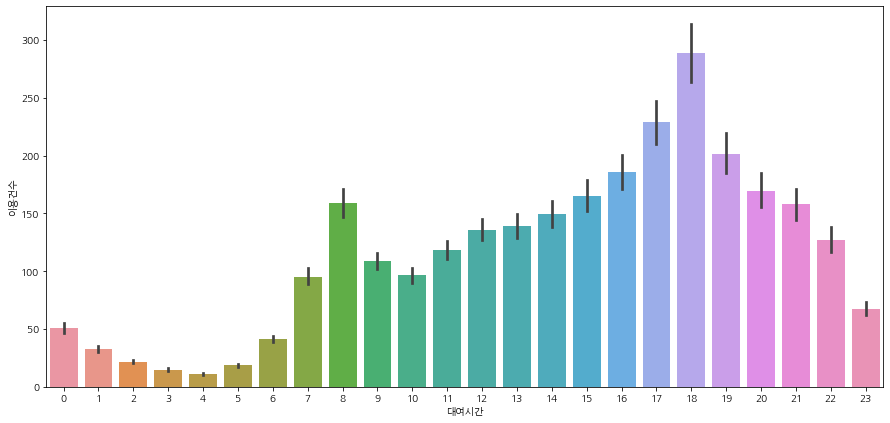

In [15]:
def barplots(x,y, data):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,data=data);
barplots('대여시간','이용건수', df) #역시 출근시간:8시, 퇴근시간:18시정도에 이용건수가 증가함.

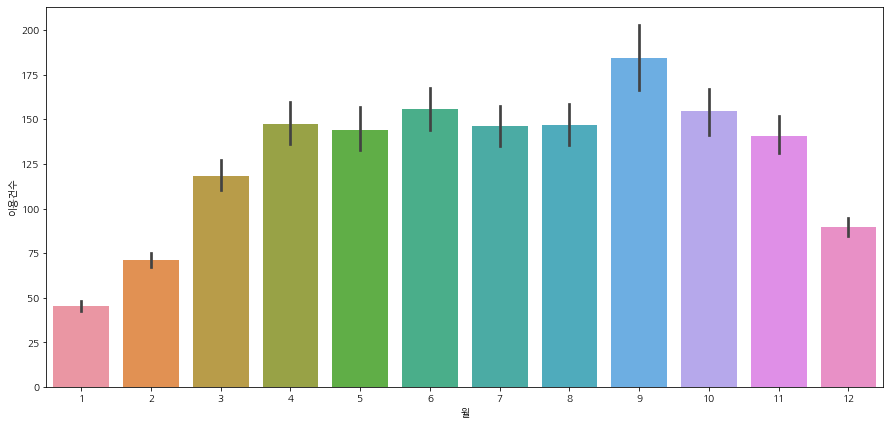

In [16]:
barplots('월', '이용건수', df) #겨울에 낮음

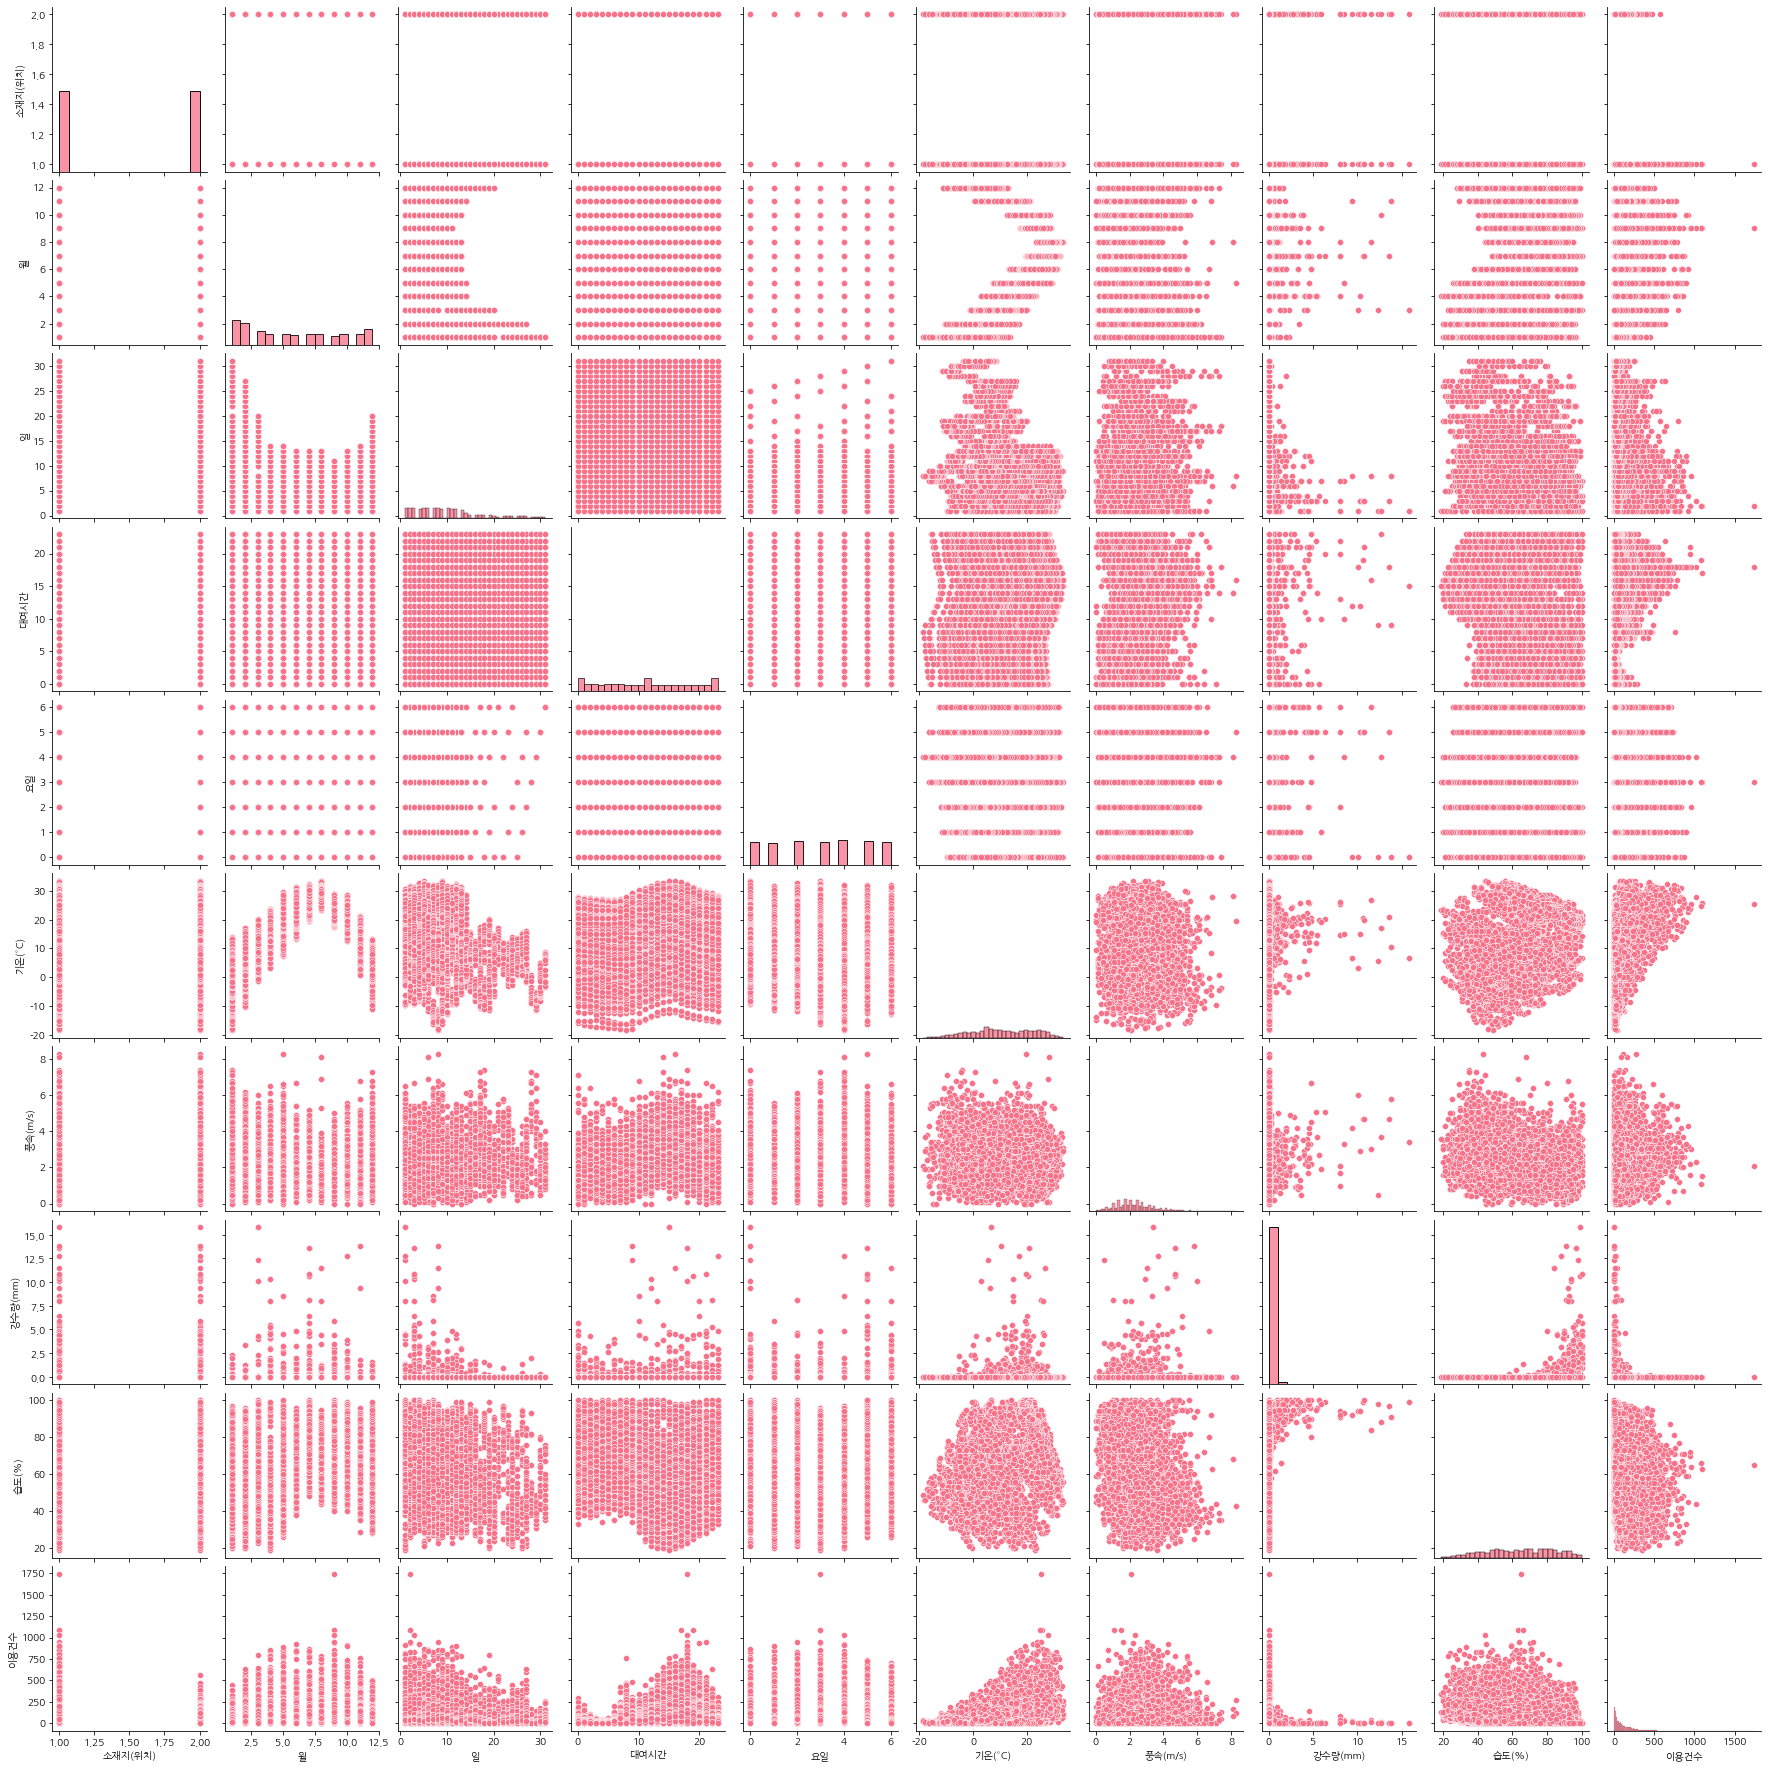

In [17]:
sns.pairplot(df)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eada38d00>,
      dtype=object)

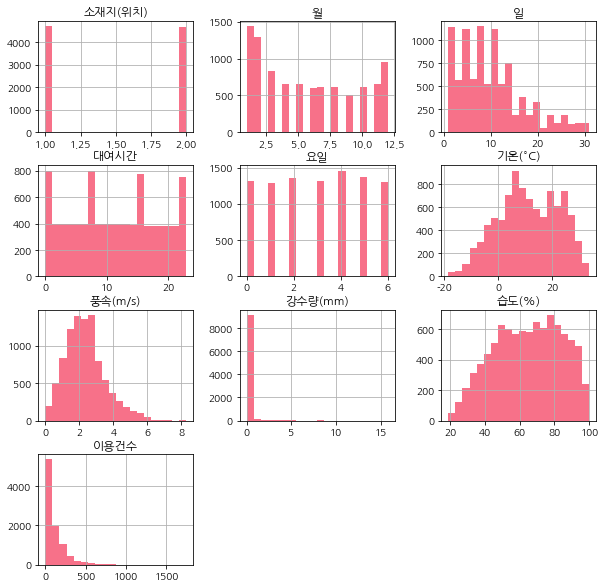

In [18]:
# feature별 분포 확인
df.hist(bins=20, figsize=(10,10))

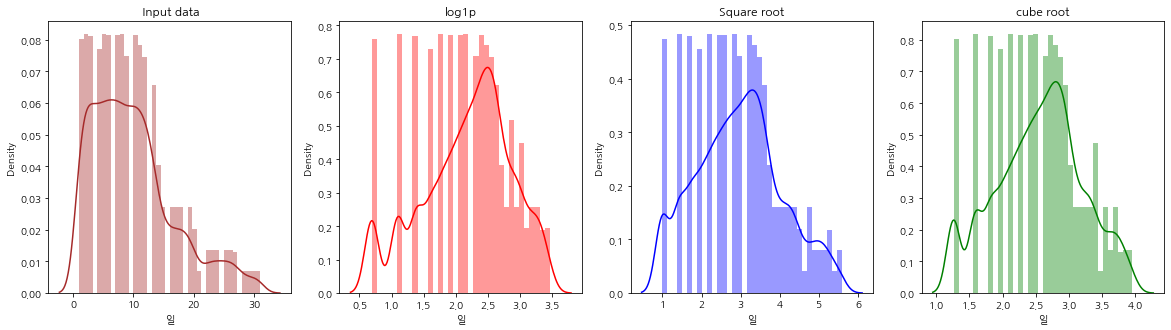

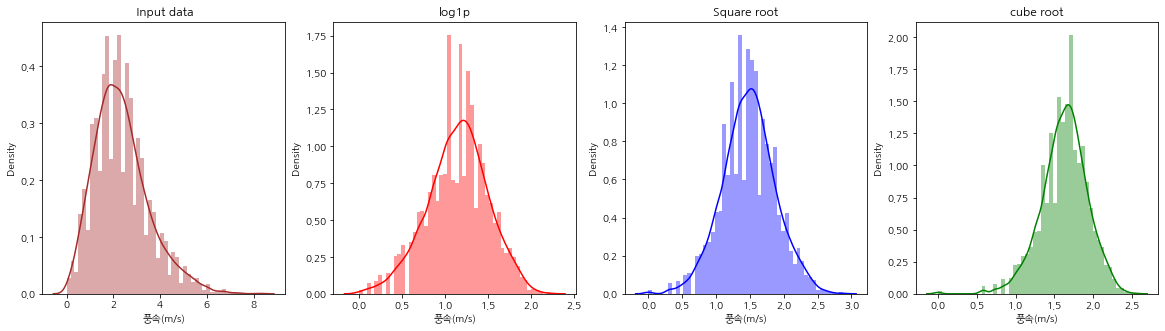

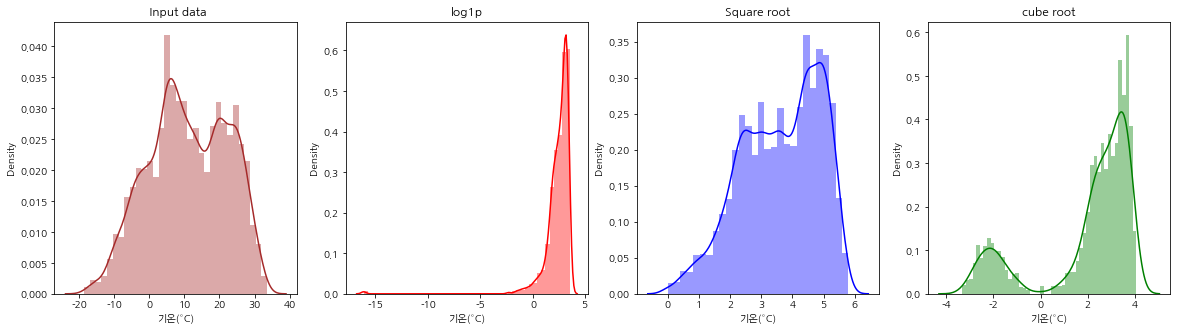

In [19]:
# apply diffrent tranformation technique and checking data distributation
def show_distribution(name, data):
  fig,axes = plt.subplots(1,4,figsize=(20,5))
  sns.distplot((data[name]),ax=axes[0],color='brown').set_title(" Input data")
  sns.distplot(np.log1p(data[name]+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data #로그스케일 적용
  sns.distplot(np.sqrt(data[name]),ax=axes[2], color='blue').set_title("Square root")
  sns.distplot(np.cbrt(data[name]*2),ax=axes[3], color='green').set_title("cube root")

''' 
함수별 정규화 적용 결과 확인
: 분포가 고르지않은 일, 풍속, 기온에 대해 log, square root, cube root scaler 적용한 결과 확인
-> 일, 풍속에 대해 log scaler 적용하는 것으로 결정
'''
show_distribution('일',df)
show_distribution('풍속(m/s)', df)
show_distribution('기온(°C)', df)

Text(0.5, 1.0, '풍속')

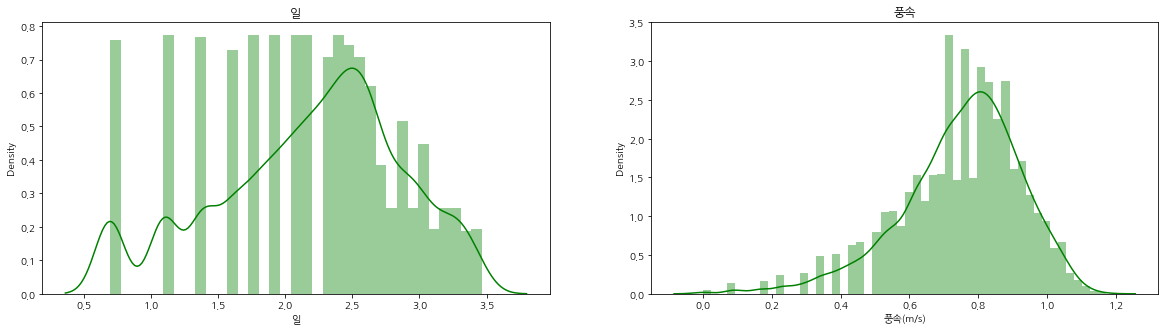

In [20]:
# 정규화 적용 (log scaler)
df['일']=np.log1p(df['일']+0.0000001)
df['풍속(m/s)'] = np.log1p(df['풍속(m/s)']+0.0000001)

# 정규화 적용 결과 확인
fig,axes = plt.subplots(1,2,figsize=(20,5))
sns.distplot((df['일']),ax=axes[0],color='green').set_title("일")
sns.distplot(np.log1p(df['풍속(m/s)']+0.0000001),ax=axes[1],color='green').set_title("풍속") #transform only posible in positive value and >0 value so add 0.0000001 in data #로그스케일 적용


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ead7f5700>,
      dtype=object)

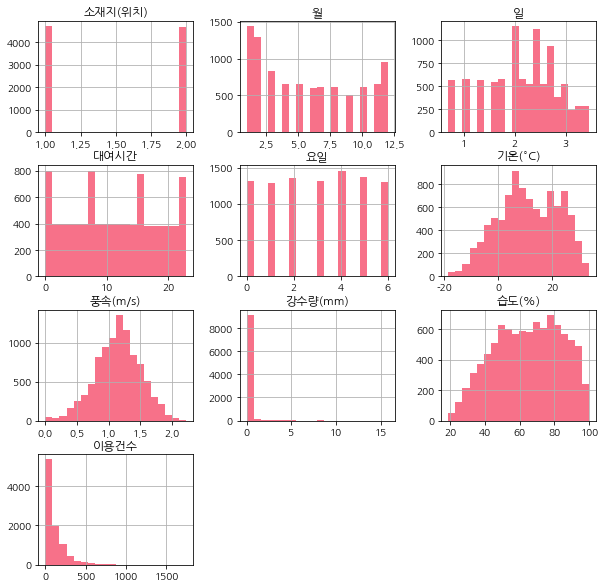

In [21]:
# draw histogram graph -- 정규화 후 전체 히스토그램 다시 그려서 확인
df.hist(bins=20, figsize=(10,10))

# Traing

In [22]:
drop_columns=['이용건수']

X=df.drop(drop_columns,axis=1)
y=df['이용건수']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (7520, 9), X_test = (1881, 9)
The shape of the train and test set for the dependent variables are : y_train = (7520,), y_test = (1881,)


In [24]:
## 하이퍼파라미터 튜닝 전
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

def print_score(name, score):
  print(f'{name}: {sum(score) / len(score)}')

#Linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# random forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

#Gradient Boosting
gf_model = GradientBoostingRegressor()
gf_model.fit(X_train,y_train)

lr_scores = cross_val_score(lr_model, X_test, y_test, cv = 5)
gf_scores = cross_val_score(gf_model, X_test, y_test, cv=5)
rf_scores = cross_val_score(rf_model, X_test, y_test, cv=5)

print_score('Linear Regression ',lr_scores)
print_score('Random forest ',rf_scores)
print_score('Gradient Boosting ', gf_scores)

Linear Regression : 0.5063719909537667
Random forest : 0.8389994244071296
Gradient Boosting : 0.8148955342424775


## Random forest Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [39]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

print("Best Parameter:",grid_rf.best_params_)
best_depth=grid_rf.best_params_

KeyboardInterrupt: ignored

In [31]:
param_grid = {
    'max_features': [1, 2, 3, 4, 5]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

print("Best Parameter:",grid_rf.best_params_)
best_features=grid_rf.best_params_

Best Score: 0.8876856228847105
Best Parameter: {'max_features': 5}


In [32]:
param_grid = {
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

print("Best Parameter:",grid_rf.best_params_)
best_leaf=grid_rf.best_params_

Best Score: 0.8871482012710251
Best Parameter: {'min_samples_leaf': 1}


In [33]:
param_grid = {
    'min_samples_split': [6, 8, 10, 12, 14, 16]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

print("Best Parameter:",grid_rf.best_params_)
best_split=grid_rf.best_params_

Best Score: 0.8822828766171964
Best Parameter: {'min_samples_split': 6}


In [34]:
param_grid = {
    'n_estimators': [1, 10, 20, 30, 40, 50, 100]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("Best Score:",grid_rf.best_score_)

print("Best Parameter:",grid_rf.best_params_)
best_estimators=grid_rf.best_params_

Best Score: 0.8862569007566176
Best Parameter: {'n_estimators': 100}


In [29]:
# random forest - r2

param_grid = {
    'max_depth': [30],
    'max_features': [5],
    'min_samples_leaf': [1],
    'min_samples_split': [6],
    'n_estimators': [40]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='r2', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)

print("Best Score:",grid_rf.best_score_)
print("Best Parameter: ",grid_rf.best_params_)

Best Score: 0.8809421993289555
Best Parameter:  {'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 40}


In [35]:
# random forest - MSE
param_grid = {
    'max_depth': [30],
    'max_features': [5],
    'min_samples_leaf': [1],
    'min_samples_split': [6],
    'n_estimators': [40]
}
grid_rf = GridSearchCV(rf_model, param_grid ,scoring='neg_mean_squared_error', cv = 5)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)
print("negative mean squared error:",grid_rf.best_score_)
print("Best Parameter: ",grid_rf.best_params_)

negative mean squared error: -2134.4964139376207
Best Parameter:  {'max_depth': 30, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 40}


## Gradient Boosting GridSearch

In [44]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

print("Best Parameter:",grid_gb.best_params_)
best_depth=grid_gb.best_params_

KeyboardInterrupt: ignored

In [ ]:
param_grid = {
    'max_features': [1, 2, 3, 4, 5]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

print("Best Parameter:",grid_gb.best_params_)
best_features=grid_gb.best_params_

In [ ]:
param_grid = {
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

print("Best Parameter:",grid_gb.best_params_)
best_leaf=grid_gb.best_params_

In [ ]:
param_grid = {
    'min_samples_split': [6, 8, 10, 12, 14, 16]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

print("Best Parameter:",grid_gb.best_params_)
best_split=grid_gb.best_params_

In [ ]:
param_grid = {
    'n_estimators': [1, 10, 20, 30, 40, 50, 100]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("Best Score:",grid_gb.best_score_)

print("Best Parameter:",grid_gb.best_params_)
best_estimators=grid_gb.best_params_

In [40]:
# gradient boosting - r2
param_grid = {
    'max_depth': [10],
    'max_features': [5],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='r2', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)

print("Best Score:",grid_gb.best_score_)
print("Best Parameter: ", grid_gb.best_params_)

Best Score: 0.9261944864358872
Best Parameter:  {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [45]:
# gradient boosting - MSE
param_grid = {
    'max_depth': [10],
    'max_features': [5],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100]
}
grid_gb = GridSearchCV(gf_model, param_grid,scoring='neg_mean_squared_error', cv = 5)
grid_gb.fit(X_train, y_train)
y_pred2 = grid_gb.predict(X_test)
print("negative mean squrred error:",grid_gb.best_score_)

negative mean squrred error: -1305.1277866516812


## visualization

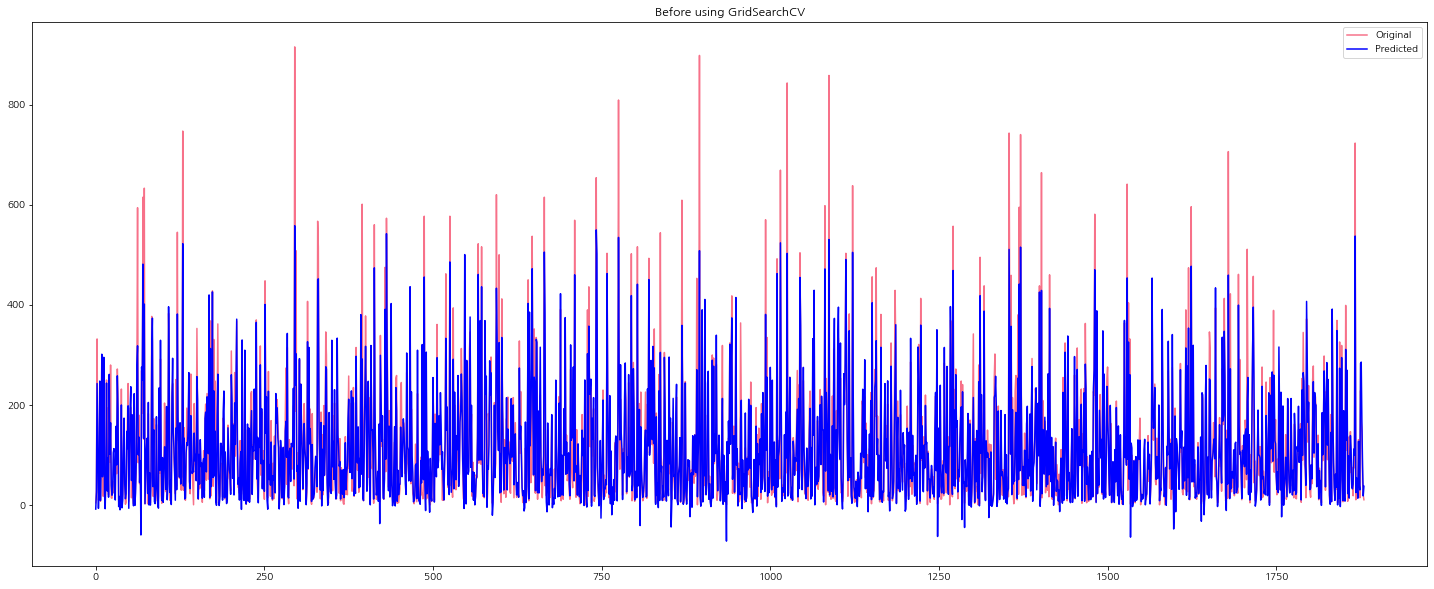

In [46]:
## 하이퍼파라미터 튜닝 전 기본 모델

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
y_pred=gb_model.predict(X_test)

x_ax = range(len(y_test))
plt.figure(figsize=(25,10))
plt.title("Before using GridSearchCV")
plt.plot(x_ax, y_test, label='Original')
plt.plot(x_ax, y_pred, color="blue", label='Predicted')
plt.legend()
plt.show()

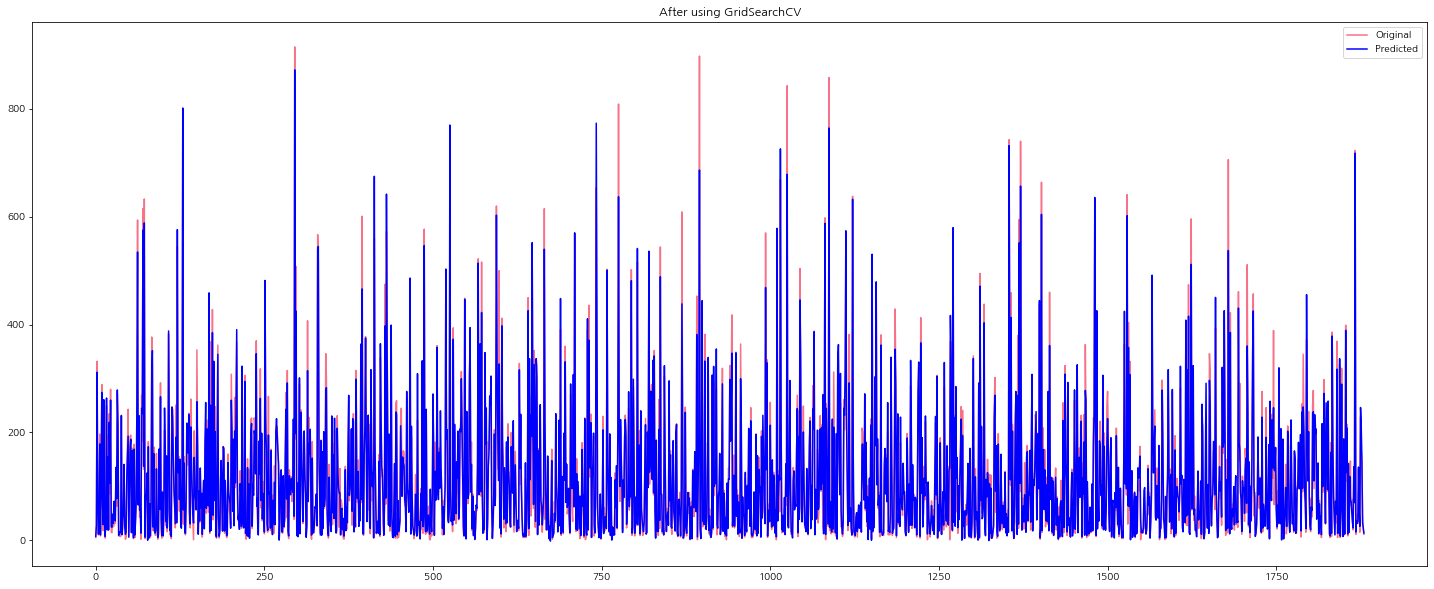

In [47]:
x_ax = range(len(y_test))
plt.figure(figsize=(25,10))
plt.title("After using GridSearchCV")
plt.plot(x_ax, y_test, label='Original')
plt.plot(x_ax, y_pred2, color="blue", label='Predicted')
plt.legend()
plt.show()

# Interpretation

## Feature Importance

[0.17077319 0.05485592 0.02502406 0.35227953 0.03348779 0.20655908
 0.02580566 0.04628208 0.0849327 ]


<BarContainer object of 9 artists>

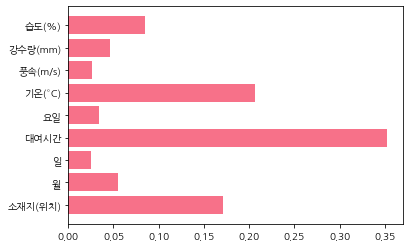

In [48]:
## 랜덤포레스트 젤 정확도 높은 모델로 돌리기 

print(grid_rf.best_estimator_.feature_importances_)
plt.barh(X_train.columns, grid_rf.best_estimator_.feature_importances_)

[0.16587634 0.05695201 0.02722369 0.36372636 0.04152232 0.19784423
 0.02218821 0.05615692 0.06850993]


<BarContainer object of 9 artists>

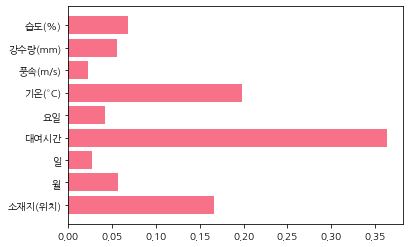

In [49]:
## 그래디언트 부스팅 젤 높은 모델에서 돌리기 

import matplotlib.pyplot as plt

print(grid_gb.best_estimator_.feature_importances_)
plt.barh(X_train.columns, grid_gb.best_estimator_.feature_importances_)

## Insight

In [50]:
# 테스트 데이터셋의 feature와 모델 예측값, 실제값 수치 확인
print(X_test[0:5])
print(y_pred2[0:5])
print(y_test[0:5])

      소재지(위치)  월         일  대여시간  요일  기온(°C)   풍속(m/s)  강수량(mm)  습도(%)
4872        2  1  2.079442    22   3   -15.3  1.252763      0.0     54
4838        2  1  1.945910    12   2    -6.0  1.193922      0.0     37
1978        1  4  2.302585     8   4    10.6  1.667707      0.0     52
6464        2  3  2.995732    10   4    14.4  1.410987      0.0     48
5828        2  2  2.890372    23   2    -9.1  1.589235      0.0     47
[  7.27823213  27.38858829 311.55247854  68.91069443  11.41321837]
4872      5.0
4838     29.0
1978    332.0
6464     78.0
5828     10.0
Name: 이용건수, dtype: float64


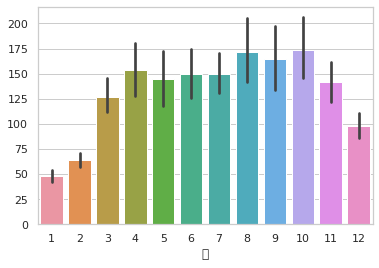

In [59]:
sns.set_theme(style="whitegrid")
sns.barplot(X_test['월'],y_pred2) # 겨울

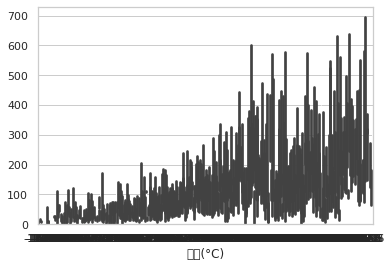

In [60]:
sns.set_theme(style="whitegrid")
sns.barplot(X_test['기온(°C)'], y_pred2,color='green')

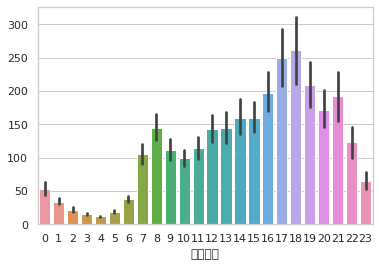

In [54]:
sns.barplot(X_test['대여시간'],y_pred2)

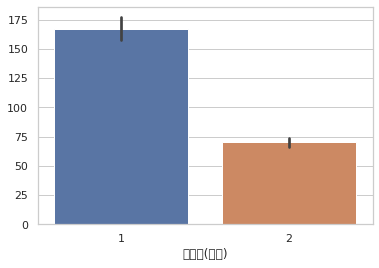

In [55]:
sns.barplot(X_test['소재지(위치)'],y_pred2)